# Explore here

Cargamos librerias y CSV

In [53]:
#Importamos librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

df = pd.read_csv("/workspaces/machine-learning-vicentepolo/data/raw/medical_insurance_cost.csv", sep= ',' )

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Análisis de constantes. Recordamos que si tienen valores de 1 son candidatos a ser eliminados. 

In [2]:
n_unicos = df.nunique()
n_unicos

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Revisión de duplicados

In [3]:
duplicadas = df[df.duplicated(keep=False)]

duplicadas



,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


Procedemos a eliminar los duplicados

In [4]:
df.drop(df[df.duplicated()].index, inplace=True)

Realizamos una segunda comprobación

In [5]:
df.duplicated().sum()

np.int64(0)

Comprobamos valores faltantes

<Axes: >

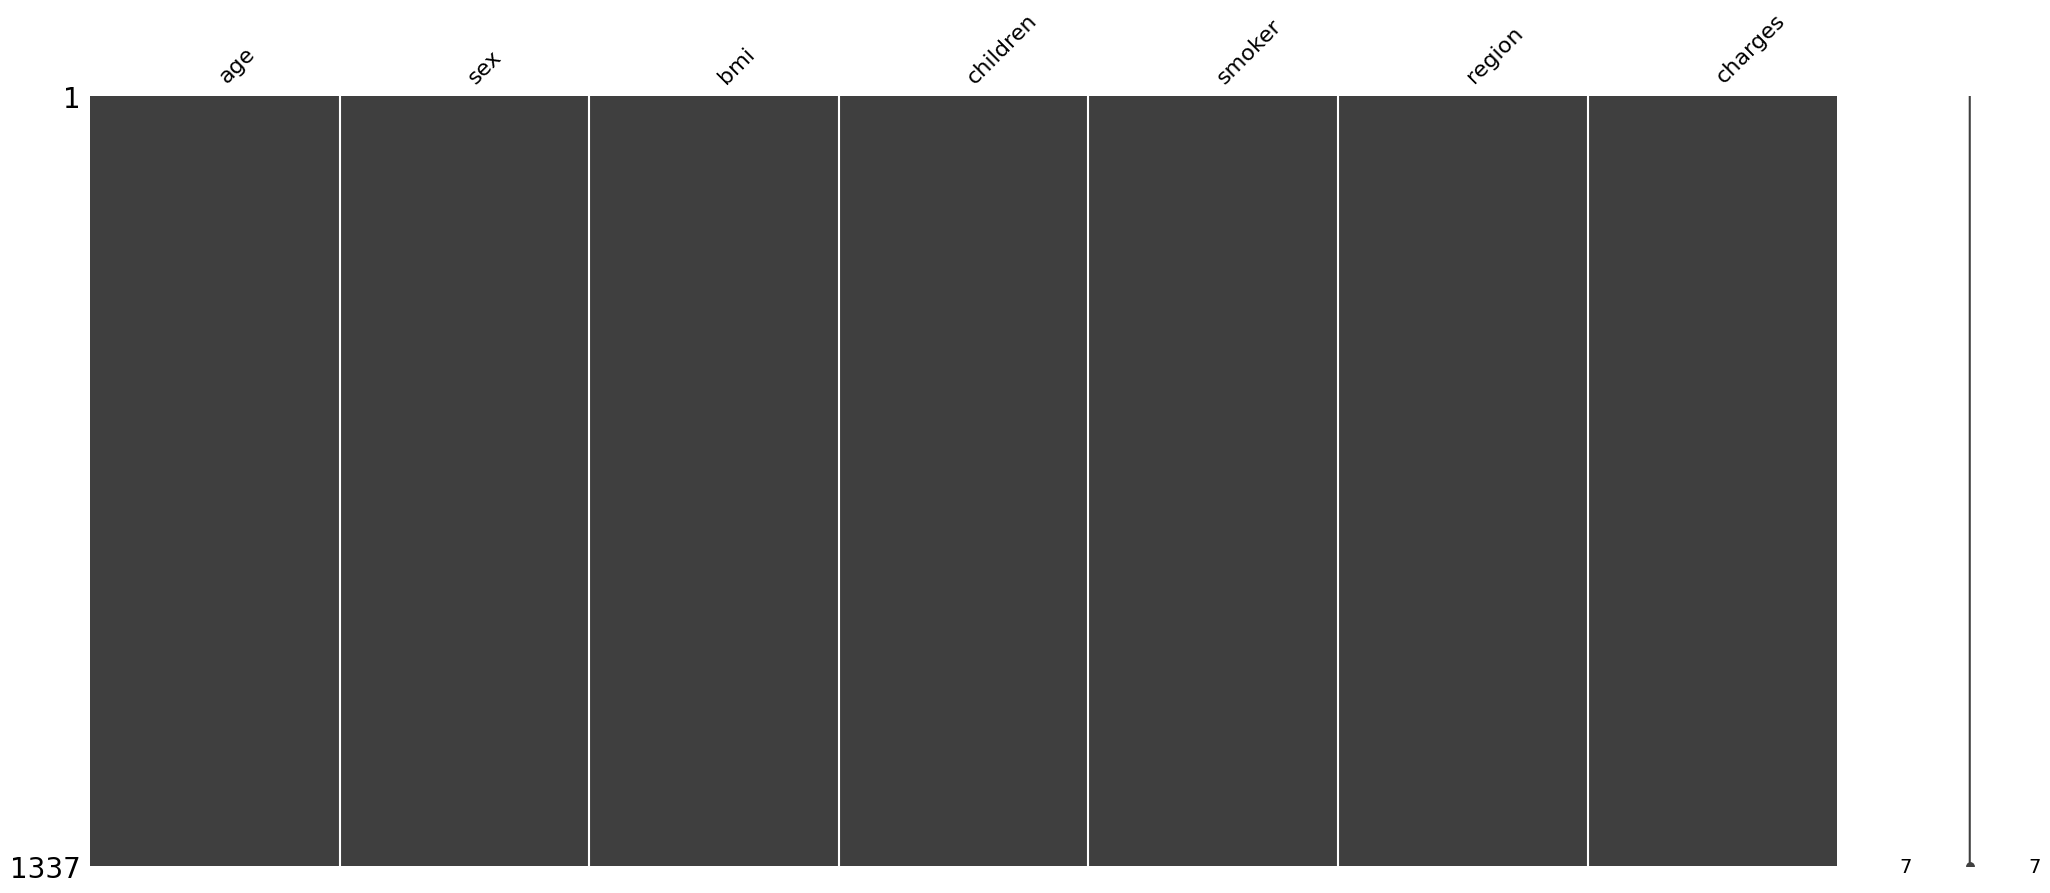

In [35]:
msno.matrix(df)

In [36]:
df.isnull().mean()*100

age        0.00
sex        0.00
bmi        0.00
children   0.00
smoker     0.00
region     0.00
charges    0.00
dtype: float64

Comprobación de columnas categóricas 

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Se entiende que charges va a ser la variable independiente. Hay que transformar el resto de valores de tipo object a numéricos

In [7]:
df["sex"] = pd.factorize(df["sex"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
df["region"] = pd.factorize(df["region"])[0]

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


Comprobamos que efectivamente la conversión ha sido llevada a cabo

In [9]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

# Procedemos a asignar valores a X e Y

In [11]:

X = df.drop(['charges'], axis=1)
y = df['charges']

Ajustamos a un modelo de regresion lineal

In [30]:

X = sm.add_constant(X)  
# Ajustar el modelo a los datos
model = sm.OLS(y, X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     667.0
Date:                Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                        09:10:40   Log-Likelihood:                -13539.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1330   BIC:                         2.713e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.095e+04   1064.523     10.282      0.0

Dado el valor de R-squared podemos determinar que el modelo explica el 75.1% de la variabilidad en la variable dependiente (charges), por lo que es un señal de que ajusta bien los datos.

F-statistic nos muestra que el modelo es significativo para predecir charges. 

En los coeficientes destaca el hecho de que los no fumadores tienden a tener menos cargos que los fumadores. 

P>|t| nos muestra que la variable sexo no es significativa dado que no hay una diferencia clara en los cargos basados en el sexo. 


Procedemos a eliminar la columna sex

In [32]:
X = X.drop(columns=['sex'])

Exploramos la relación entre fumar y el bmi

In [35]:
X['smoker_bmi'] = X['smoker'] * X['bmi']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1166.
Date:                Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                        09:32:49   Log-Likelihood:                -13241.
No. Observations:                1337   AIC:                         2.650e+04
Df Residuals:                    1330   BIC:                         2.653e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.403e+04   1530.381    -15.700      0.0

Conclusiones: 

R-Squared ahora es de 84%, frente al 75% anterior, esto significa que se consigue una información mas relevante.

Que el BIC presente un valor menor también nos indica que el modelo explica mejor los datos.

- Cuanto mas años se tiene, mayor el recargo
- A mayor indice de masa corporal, mas se paga. 
- Por cada hijo adicional, mayor el cargo
- Los fumadores tienen cargos muy significativos

Respecto a la relación bmi-fumadores: A medida que aumenta el índice de masa corporal (bmi), el efecto positivo de smoker sobre charges disminuye.





# Residuos

In [40]:
residuos = model.resid

Mostramos en la gráfica

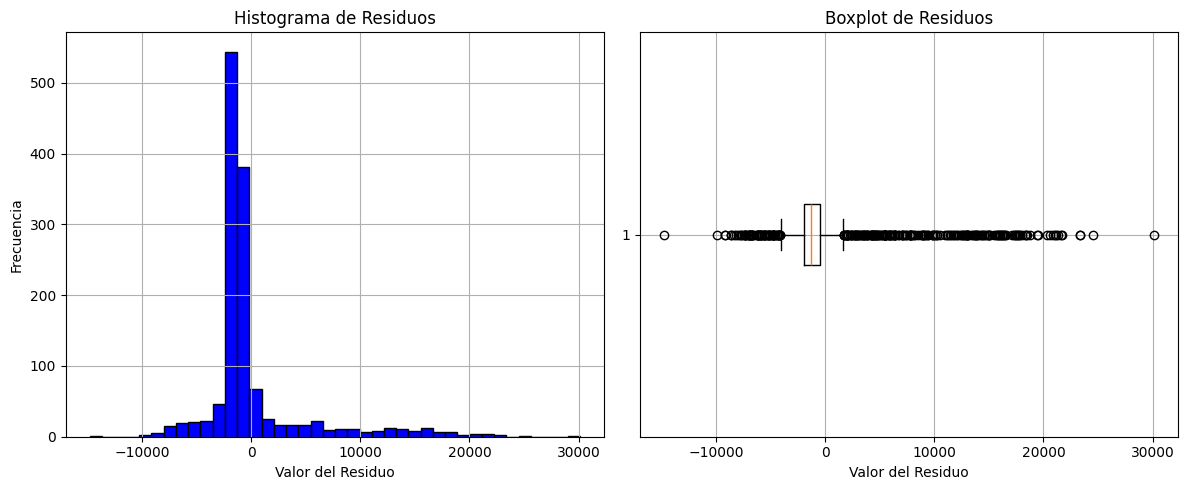

In [41]:
# Crea una figura con dos subgráficos (uno para el histograma y otro para el boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)

# Muestra la figura con ambos gráficos
plt.tight_layout()  # Ajusta los márgenes para evitar superposiciones
plt.show()

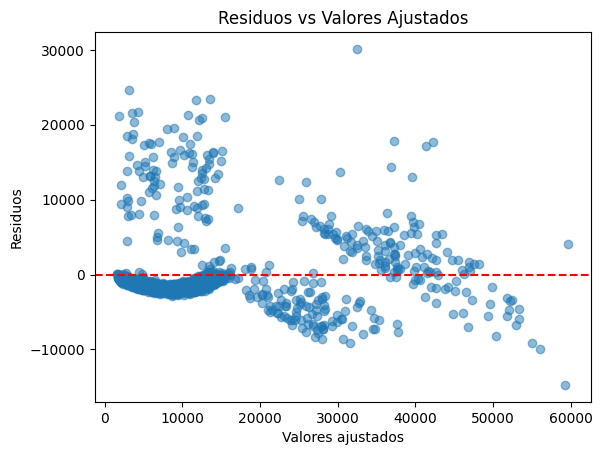

In [47]:
# Valores ajustados
fitted_values = model.fittedvalues

# Gráfico de residuos vs valores ajustados
import matplotlib.pyplot as plt
plt.scatter(fitted_values, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.show()

Este gráfico muestra una dispersión de residuos que se van MUCHO de 0 , que es lo deseable. 

In [42]:
np.mean(residuos)

np.float64(-3.9010452177645825e-10)

Dados los valores aproximados a 0, podemos decir que el modelo está bien ajustado

In [45]:
stats.shapiro(residuos)

ShapiroResult(statistic=np.float64(0.6619400027177302), pvalue=np.float64(1.9732372858235947e-45))

Sin embargo , tras el test de Shapiro, el pvalue nos dice que los residuos no se ajustan bien a una distribución normal.

Por lo que la opción que voy a tomar es escalar los datos.


In [57]:
from scipy.stats import shapiro

X[['scaled_bmi', 'scaled_age']] = (X[['bmi', 'age']] - X[['bmi', 'age']].mean()) / X[['bmi', 'age']].std()
model = sm.OLS(y, sm.add_constant(X[['scaled_bmi', 'scaled_age', 'children', 'smoker']])).fit()
residuos = model.resid

stats.shapiro(residuos)


ShapiroResult(statistic=np.float64(0.8997158316879277), pvalue=np.float64(1.0623930014341759e-28))

No hemos conseguido mejorar mucho. P-value sigue siendo extremadamente bajo. Esto significa que los residuos todavía no se ajustan adecuadamente a una distribución normal.

Probamos a transformar logarítmicamente.

In [59]:
X['log_bmi'] = np.log(X['bmi'] + 1)  # Agregar 1 para evitar log(0)
model = sm.OLS(y, sm.add_constant(X[['log_bmi', 'age', 'children', 'smoker']])).fit()

residuos = model.resid

stats.shapiro(residuos)

ShapiroResult(statistic=np.float64(0.8994169931067265), pvalue=np.float64(9.776919565149881e-29))

Intento usar un modelo robusto (Me voy quedando sin ideas)

In [64]:
model=sm.OLS(y, X).fit(cov_type='HC1')
residuos = model.resid

stats.shapiro(residuos)

ShapiroResult(statistic=np.float64(0.6723663788995051), pvalue=np.float64(5.98074592522149e-45))

Los resultados han mejorado, pero como hemos visto en el gráfico de dispersión anterior, tenemos un claro problema de outliers que se separan con mucho de 0. 

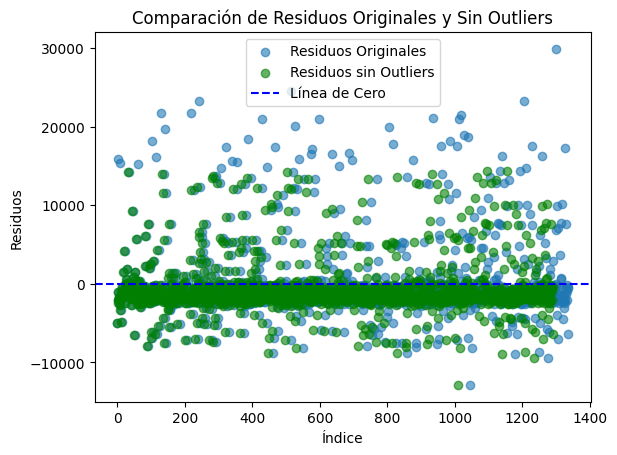

In [ ]:
from scipy.stats import zscore
# Crear gráfico de dispersión con outliers
plt.scatter(range(len(residuos)), residuos, alpha=0.6, label='Residuos Originales')

# Crear gráfico de dispersión sin outliers
z_scores = zscore(residuos)
outliers = np.abs(z_scores) > 3
residuos_sin_outliers = residuos[~outliers]
plt.scatter(range(len(residuos_sin_outliers)), residuos_sin_outliers, color='green', alpha=0.6, label='Residuos sin Outliers')

plt.axhline(y=0, color='blue', linestyle='--', label='Valor cero')
plt.xlabel('Índice')
plt.ylabel('Residuos')
plt.title('Comparación de Residuos Originales y Sin Outliers')
plt.legend()
plt.show()

Como podemos ver en el gráfico, eliminar outliers hará que nuestros valores se aproximen a 0.

In [72]:
model=sm.OLS(y, X).fit(cov_type='HC1')
residuos = model.resid

stats.shapiro(residuos_sin_outliers)

ShapiroResult(statistic=np.float64(0.7388382253892537), pvalue=np.float64(5.567663701525651e-41))

ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))

# Dividimos data set entre train y test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): 11291.590752555612
Coefficients (b): [     0.            248.76407134    -99.69539417    312.60904469
    534.12087654 -23052.15275173    237.62514748]


In [25]:
y_pred = model.predict(X_test)
y_pred

array([ 8.08045019e+03,  5.59287112e+03,  1.43782987e+04,  3.17318195e+04,
        9.15835694e+03,  1.33610143e+04,  3.02576553e+04,  1.30864736e+03,
        1.08494254e+04,  1.13755485e+04,  1.04822214e+04,  3.31558608e+04,
        3.09123841e+04,  1.71688443e+04,  1.06361393e+04,  9.37424715e+03,
        3.96524338e+03,  3.19229863e+04,  3.08468457e+03,  5.47544373e+03,
        3.76844305e+03,  3.01552667e+04,  1.50768984e+04,  3.02746510e+04,
        3.10830548e+04,  5.52001772e+03,  3.56655758e+04,  3.63713163e+04,
        1.12979802e+04,  1.40664742e+04,  6.37519963e+03,  1.29381095e+04,
        6.79284837e+02,  1.19476924e+04,  3.97832706e+04,  1.21517558e+04,
        4.57717842e+03,  4.01652351e+03,  3.11475453e+04,  9.22301501e+03,
        6.86852604e+03,  3.00358113e+04,  3.49732855e+04,  1.21709787e+04,
        7.46262777e+03,  3.27014535e+03,  6.02195905e+03,  8.81742438e+03,
        4.32171874e+03,  9.25718479e+03,  6.82679737e+03,  1.18887556e+04,
        3.11350727e+04,  

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 35493102.61165051
Coefficient of determination: 0.8068466322629112


Ver coeficientes del modelo y su importancia relativa

In [27]:

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
coefficients["Absolute Coefficient"] = coefficients["Coefficient"].abs()
coefficients = coefficients.sort_values(by="Absolute Coefficient", ascending=False)

print(coefficients)

    Feature   Coefficient  Absolute Coefficient
5    smoker -23052.152752          23052.152752
4  children    534.120877            534.120877
3       bmi    312.609045            312.609045
1       age    248.764071            248.764071
6    region    237.625147            237.625147
2       sex    -99.695394             99.695394
0     const      0.000000              0.000000


Comprobamos que no hay variables con valores cercanos a 0, por lo que determinamos que si que son importantes

# Escalado de datos

In [52]:
# Escalar solo las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Redistribuimos de nuevo
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Evaluamos nuevamente
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 35493102.61165053
R-squared (R²): 0.8068466322629111


Como podemos comprobar no hay diferencia significativa

# Mejora de la eficiencia mediante hiperparámetros